In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

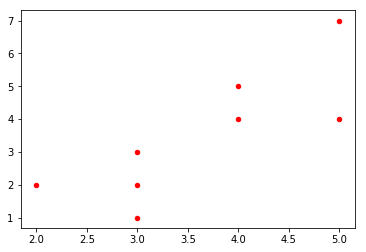

In [2]:
X = np.array([[3, 1], [2, 2], [3,2], [3, 3],[4,4],[4, 5],[5, 7],[5, 4]])
plt.scatter(X[:, 0], X[:, 1], c='red', s=20)

# Define distance functions

In [3]:
# Euclidean Distance Caculator


def dist(a, b, ax =1):
    return np.linalg.norm(a - b, axis=ax)









# Initialize the cluster centers

In [32]:
# Number of clusters 


k = 2

# cluster centers

C = np.array([[2,2],[4,5]])


# Loop of the K-means algorithm

In [33]:
def plot_cluster_status():
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


point  0  is assigned to  0
point  1  is assigned to  0
point  2  is assigned to  0
point  3  is assigned to  0
point  4  is assigned to  1
point  5  is assigned to  1
point  6  is assigned to  1
point  7  is assigned to  1
Centers were  [[2 2]
 [4 5]]
------------------


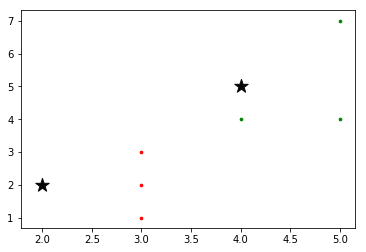

In [34]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))


# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)


# Loop will run till the error becomes zero
while(error!=0):
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        #complete the cluster assignment 
        
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        print('point ' , i, ' is assigned to ' , cluster)

    # Storing the old centroid values
    C_old = deepcopy(C)

    
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

    print('Centers were ', C_old)
    print('------------------')
    plot_cluster_status()
    error = dist(C, C_old, None)


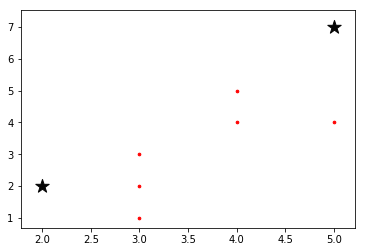

In [30]:
#Final output
plot_cluster_status()

# Compare with sklearn

In [35]:
from sklearn.cluster import KMeans


# run clustering with SKlearn
kmeans = KMeans(n_clusters=2)

kmeans = kmeans.fit(X)

labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

print(kmeans.labels_)


[1 1 1 1 0 0 0 0]


In [39]:
# Comparing with scikit-learn centroids & silhouette_score
from sklearn.metrics import silhouette_score

print("***************************** From scratch *****************************")
print(C)
print(silhouette_score(X, clusters))

print("***************************** From Scikit learn *****************************")
print(centroids)
print(silhouette_score(X, kmeans.labels_))

# compare the results in term of the centers and silhouette_score


***************************** From scratch *****************************
[[2 2]
 [4 5]]
0.5239235886291701
***************************** From Scikit learn *****************************
[[4.5  5.  ]
 [2.75 2.  ]]
0.5239235886291701


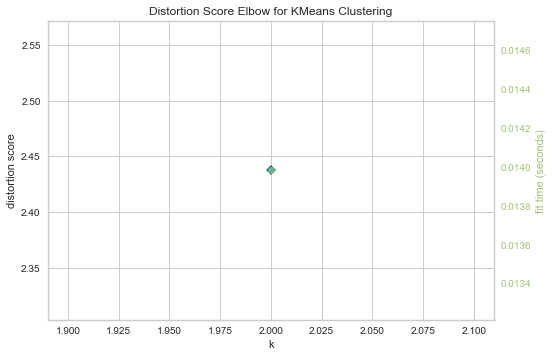

In [42]:
#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,))

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 